# Correlations
Version: April 24th, 2024

---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
sectors = pd.read_csv('data/sectors.csv')
commitments = pd.read_csv('data/commitments.csv')

In [3]:
sectors = sectors[sectors['YEAR']!=2017]

In [4]:
companies = sectors.groupby('COMPANY NAME').median(numeric_only=True).reset_index().drop(columns='YEAR').drop(columns='COMPANY SIZE')

Calculate correlation coefficients according to Kendall Tau because this method is preferred in the case of small sample sizes or the presence of outliers 

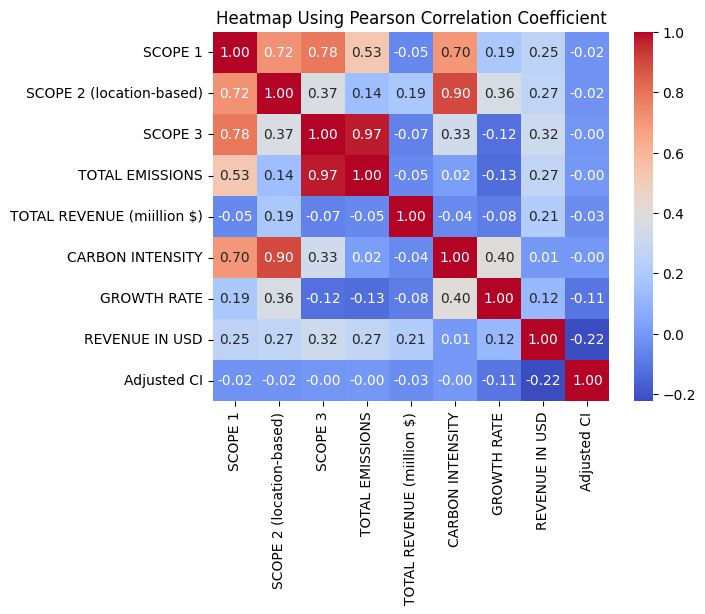

In [5]:
corr = companies.corr(method='pearson', numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Using Pearson Correlation Coefficient')
plt.show();


In [6]:
corr

,SCOPE 1,SCOPE 2 (location-based),SCOPE 3,TOTAL EMISSIONS,TOTAL REVENUE (miillion $),CARBON INTENSITY,GROWTH RATE,REVENUE IN USD,Adjusted CI
SCOPE 1,1.000000,0.716554,0.784924,0.528737,-0.049880,0.701647,0.188669,0.254326,-0.022763
SCOPE 2 (location-based),0.716554,1.000000,0.372281,0.142091,0.190773,0.898768,0.357854,0.266289,-0.021078
SCOPE 3,0.784924,0.372281,1.000000,0.974816,-0.066381,0.329504,-0.119800,0.318276,-0.004587
TOTAL EMISSIONS,0.528737,0.142091,0.974816,1.000000,-0.050917,0.024331,-0.129704,0.273026,-0.003266
TOTAL REVENUE (miillion $),-0.049880,0.190773,-0.066381,-0.050917,1.000000,-0.042864,-0.081345,0.212832,-0.034448
CARBON INTENSITY,0.701647,0.898768,0.329504,0.024331,-0.042864,1.000000,0.398869,0.005415,-0.003314
GROWTH RATE,0.188669,0.357854,-0.119800,-0.129704,-0.081345,0.398869,1.000000,0.124899,-0.105285
REVENUE IN USD,0.254326,0.266289,0.318276,0.273026,0.212832,0.005415,0.124899,1.000000,-0.223695
Adjusted CI,-0.022763,-0.021078,-0.004587,-0.003266,-0.034448,-0.003314,-0.105285,-0.223695,1.000000


## Sectors Merged with Commitments

In [7]:
sectors

,COMPANY NAME,YEAR,SCOPE 1,SCOPE 2 (location-based),SCOPE 2 (market-based),SCOPE 3,TOTAL EMISSIONS,TOTAL REVENUE (miillion $),CURRENCY,CARBON INTENSITY,COUNTRY OF ORIGIN,SUBMIT TO CDP,GROWTH RATE,COMPANY SIZE,SECTOR,REVENUE IN USD,Adjusted CI
0,Anheuser-Busch InBev,2018,3700760.0,2383505.0,2059760,24431839.0,30516104.0,54619.0,USD,111.390,Belgium,True,NaN,NaN,Food & Agriculture,54619.0,111.39
1,Anheuser-Busch InBev,2019,3600710.0,2215902.0,1761444,26484447.0,32301059.0,52329.0,USD,111.150,Belgium,True,-4.19,NaN,Food & Agriculture,52329.0,111.15
2,Anheuser-Busch InBev,2020,3081905.0,2227758.0,1633815,23652933.0,28962596.0,46881.0,USD,113.260,Belgium,True,-10.41,NaN,Food & Agriculture,46881.0,113.26
3,Anheuser-Busch InBev,2021,2953896.0,2243990.0,1456823,26527444.0,31725330.0,54304.0,USD,95.720,Belgium,True,15.83,NaN,Food & Agriculture,54304.0,95.72
4,Anheuser-Busch InBev,2022,2843883.0,2029211.0,826257,24136111.0,29009205.0,57786.0,USD,84.330,Belgium,True,6.41,NaN,Food & Agriculture,57786.0,84.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,TSMC,2018,2125725.0,7001655.0,6349642.0,4315604.0,19792626.0,1031000.0,TWD,8.853,Taiwan,True,NaN,NaN,Tech,30930.0,295.10
213,TSMC,2019,2071743.0,7350195.0,6697872.0,5307729.0,21427539.0,1069950.0,TWD,8.806,Taiwan,True,3.78,NaN,Tech,32098.5,293.53
214,TSMC,2020,2010692.0,8282509.0,7459856.0,5571946.0,23325003.0,1339000.0,TWD,7.687,Taiwan,True,25.15,NaN,Tech,40170.0,256.24
215,TSMC,2021,2151937.0,9196964.0,8152497.0,6127157.0,25628555.0,1587420.0,TWD,7.149,Taiwan,True,18.55,NaN,Tech,47622.6,238.31


In [8]:
# sectors.merge(commitments, on='')
cleaned_comm = commitments[['Company Name', 'Sector', 'Net Zero By X', 'RE100 By X',
       'SBTI Committed', 'SBTI Targets', 'Pledge to Adopt Low-Carbon Tech',
       'Pledge to Invest in Low-Carbon']]

In [9]:
commitments.dtypes

Company Name                        object
Sector                              object
Net Zero By X                      float64
RE100 By X                         float64
SBTI Committed                     float64
SBTI Targets                         int64
Pledge to Adopt Low-Carbon Tech     object
Pledge to Invest in Low-Carbon     float64
Supply Chain Pledge to Report      float64
Supply Chain Pledge to Reduce      float64
dtype: object

In [10]:

def percent_change(final, initial):
    result = ((final - initial)/initial)* 100
    return result

In [11]:
initial_year = sectors[sectors['YEAR']==2018]['TOTAL EMISSIONS'].values
final_year = sectors[sectors['YEAR']==2022]['TOTAL EMISSIONS'].values
percent = percent_change(final_year, initial_year)

In [12]:
percents = pd.read_csv('data/percentchanges.csv')
percents = percents.replace(to_replace={
    '1,190.75' : 1190.75,
    '1,795.08' : 1795.08,
    '1,198.50' : 1198.50,
    '1,440.43': 1440.43
})
percents['Percent Change (2018-2022)'] = percents['Percent Change (2018-2022)'].astype(float)
percents['Scope 3 Percent Change (2018-2022)'] = percents['Scope 3 Percent Change (2018-2022)'].astype(float)


In [13]:
merged = cleaned_comm.merge(percents, on='Company Name')
corr_matrix = merged.corr(method='kendall')

/var/folders/xy/l19hywx53pz7j31v4v0hrk5w0000gn/T/com.apple.messages/ipykernel_51022/2126907738.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = merged.corr(method='kendall')


<Axes: >

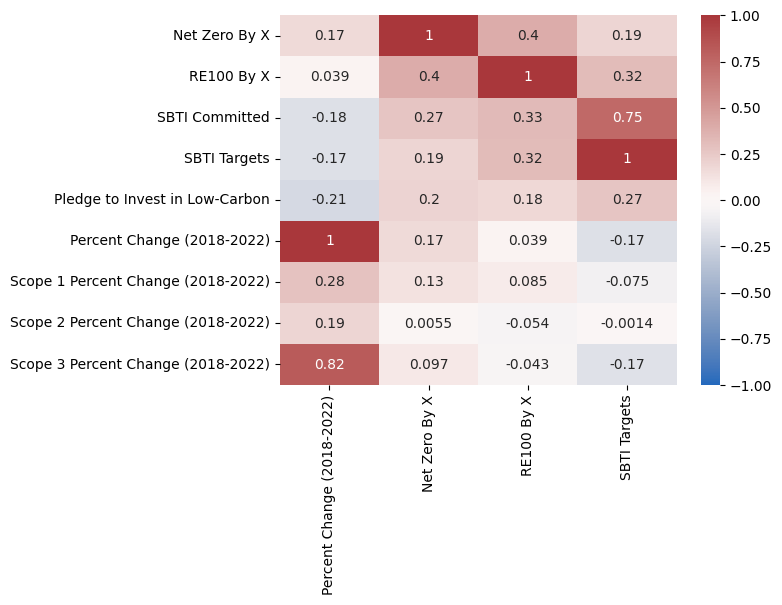

In [15]:
# handwritten example of 5x2 smaller table to sanity check kendall tau
# make sure percentages are being represented accurately
# can change cmap range (-1, 1)
submatrix  = corr_matrix[['Percent Change (2018-2022)', 'Net Zero By X', 'RE100 By X', 'SBTI Targets']]
sns.heatmap(submatrix, annot=True, cmap='vlag', vmin=-1, vmax=1)

In [ ]:
activities = pd.read_csv('data/activities.csv', skiprows=1)
emissions_activ = merged.merge(activities, on='Company Name')

In [ ]:
activties_corr = emissions_activ.corr(method='kendall', numeric_only=True).round(2).drop(columns=['Product Specific Carbon Metric (CO2/X)'])
activties_corr

In [ ]:
# color code differently to view extremes, middle is lighter color and edges darker, if care about negative or positive then use red white blue color map,
# white in the middle 
# possibly create submatrices
plt.figure(figsize=[20,20])
sns.heatmap(activties_corr, cmap='vlag', annot=True)

In [ ]:
# strong positive association